***
<font size="6"><center><b> HD-CapsNet: A Hierarchical Deep Capsule Network for Image Classification </b></center></font>
***

**Changing Model Architecture**
- **(Mod-3.1)** 32D>16D>8D (Coarse>Medium>FINE) use skip connections between Secondary Capsules $Concatenate([P_{caps}, S_{coarse}])$ > input for $S_{medium}$ and $Concatenate([P_{caps}, S_{medium}])$ > input for $S_{fine}$
- With $L_{Cons}$

# Files and Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import backend as K

import tensorflow_docs as tfdocs
import tensorflow_docs.plots

# Supporting Libraries:
    #Mathplot lib for ploting graphs
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
    # numpy and pandas
import numpy as np
import pandas as pd
    #system
import os
import sys
import csv
    #import other libraries
import math
import random
from datetime import datetime
from treelib import Tree
    # ML model, Dataset and evalution metrics
sys.path.append('../../') ### adding system parth for src folder
from src import datasets # load datasets
from src import MixUp # load datasets
from src import MixUp_add_loss # load datasets
from src import metrics # load hierarchcial metrics
from src import sysenv # load hierarchcial metrics
from src import models # load machine learning models

    ## Tensorflow_docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

    # Auto reload local libraries if updated
%load_ext autoreload
%autoreload 2

# System information & GPU growth

In [2]:
systeminfo = sysenv.systeminfo()
print(systeminfo)


• Computer Name = posix
• Working Directory = /home/knoor/Downloads/RunningOnServer/HD-CapsNet_MTree/Training_and_Analysis/7_Marin_Tree
• Python Version = 3.9.16 (main, Mar  8 2023, 14:00:05) 
[GCC 11.2.0]
• TensorFlow Version = 2.8.4
• Keras Version = 2.8.0
• Current Environment = Not Using Anaconda


In [3]:
gpus = "0,1,2,3,4,5,6,7" ## Selecting Available gpus (Multi-GPUS)
gpus = "1" ## Selecting Available gpus (Single GPU)
gpugrowth = sysenv.gpugrowth(gpus = gpus) ## Limiting GPUS from OS environment
gpugrowth.memory_growth() #GPU memory growth

Following GPUS are selected =  1
Done: GPU PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 Physical GPUs, 1 Logical GPUs


2023-04-13 21:39:46.880904: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 21:39:50.928139: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14075 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:86:00.0, compute capability: 7.0


# Parameters

In [4]:
train_params = {"n_epochs" : 100,
                "batch_size": 64,
                "lr": 0.001, # Initial learning rate
                "lr_decay": 0.95, # Learning rate decay
                "decay_exe": 9, #learning rate decay execution epoch after
               }
model_params = {"optimizer": tf.keras.optimizers.Adam(train_params['lr']),
                "loss_function": models.MarginLoss(),
               }

# log directory

In [5]:
directory = sysenv.log_dir('7_Marine_Tree/HD_CapsNet/Mod_3_1')

FOLDER CREATED =  ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_1


# Import Dataset : Marine Tree Dataset

In [6]:
dataset = datasets.get_Marine_dataset(output_level='level_depth_3', # 'level_depth_3', 'level_depth_4', 'level_depth_5
#                                       dataset_path ='D:\Datasets\Marine_tree', ## Path to the dataset directory
                                      dataset_path ='/home/knoor/Downloads/RunningOnServer/H-CapsNet_Revision/Dataset/Marine_tree', ## Path to the dataset directory
                                      image_size=(64,64),
                                      batch_size=train_params['batch_size'],
                                      subtype='Combined',
                                      data_normalizing ='normalize',
                                      class_encoding = 'One_Hot_Encoder',
                                      data_augmantation = 'mixup'
                                     )

Example =  0


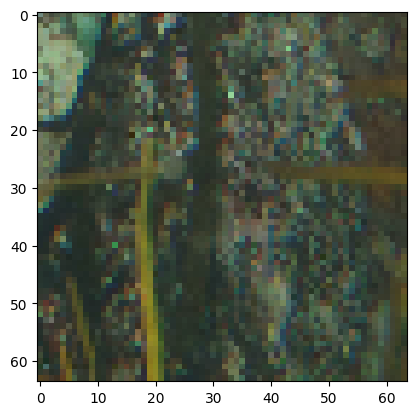

Coarse = {0: 0.98448104, 1: 0.015518946}
Medium = {7: 0.98448104, 9: 0.015518946}
Fine   = {6: 0.98448104, 11: 0.015518946}
Example =  1


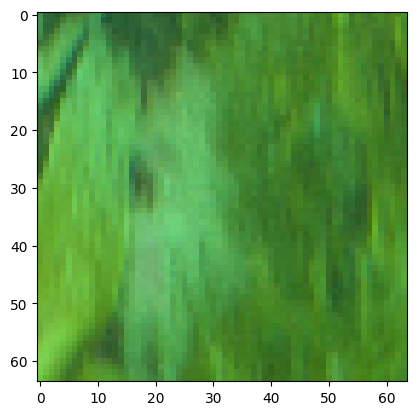

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.023294631, 33: 0.9767054}
Example =  2


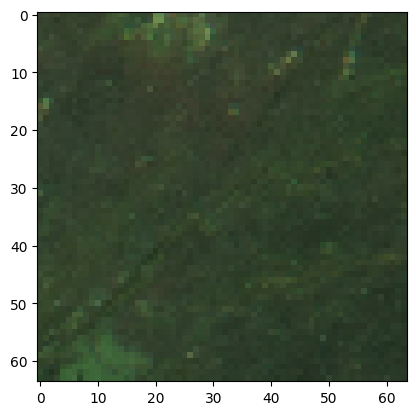

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.011833573, 33: 0.98816645}
Example =  3


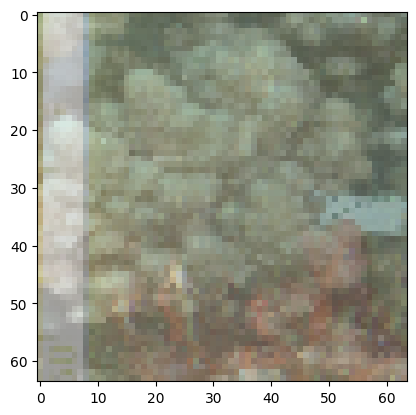

Coarse = {0: 1.0}
Medium = {1: 0.44545126, 7: 0.55454874}
Fine   = {0: 0.55454874, 32: 0.44545126}
Example =  4


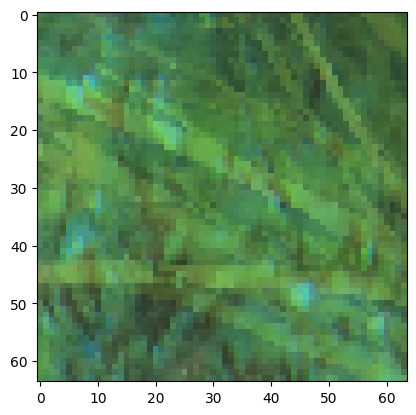

Coarse = {0: 1.0}
Medium = {0: 0.6504354, 7: 0.3495646}
Fine   = {28: 0.6504354, 33: 0.3495646}
Example =  5


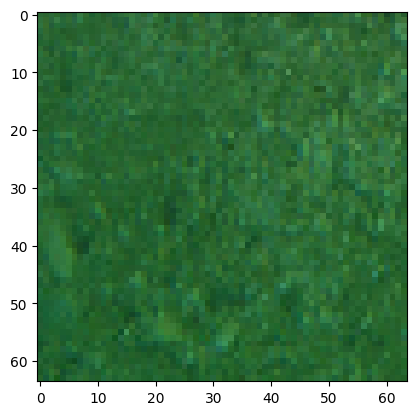

Coarse = {0: 0.00018087841, 1: 0.9998191}
Medium = {7: 0.00018087841, 9: 0.9998191}
Fine   = {10: 0.00018087841, 11: 0.9998191}
Example =  6


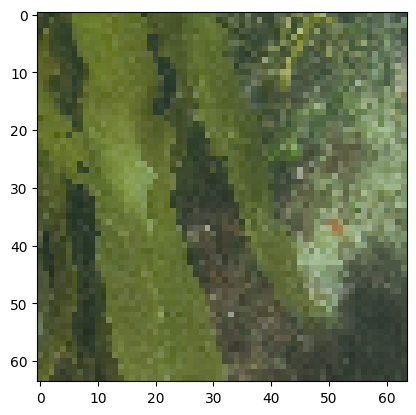

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.9695007, 33: 0.03049928}
Example =  7


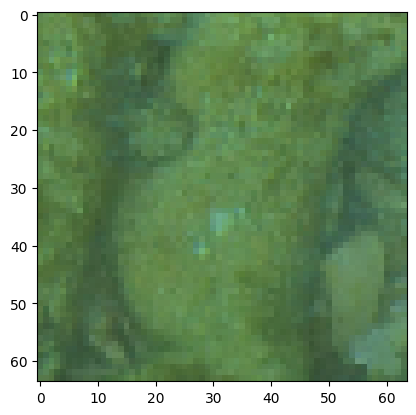

Coarse = {0: 0.18267581, 1: 0.81732416}
Medium = {1: 0.18267581, 9: 0.81732416}
Fine   = {15: 0.81732416, 32: 0.18267581}
Example =  8


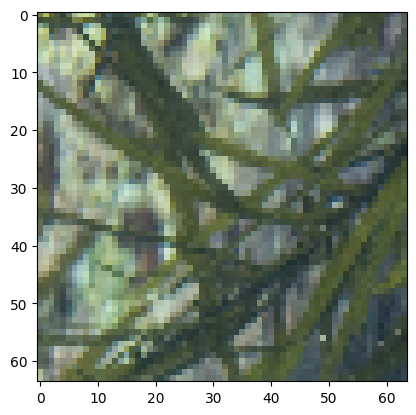

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.00022424868, 33: 0.99977577}
Example =  9


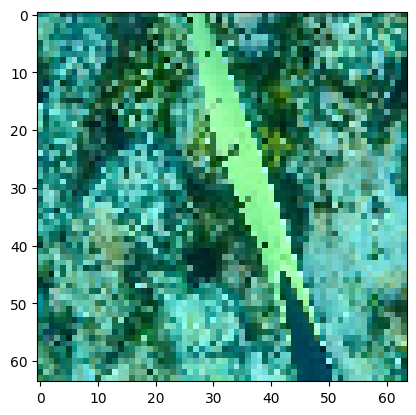

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {8: 0.9968012, 10: 0.0031988025}
Example =  10


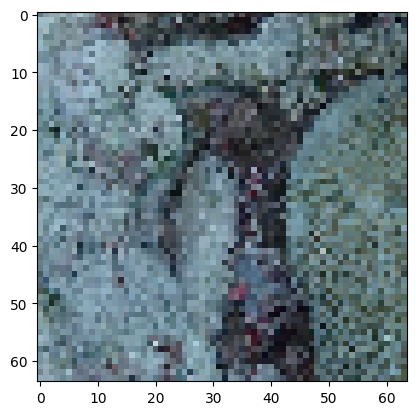

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 1.0}
Example =  11


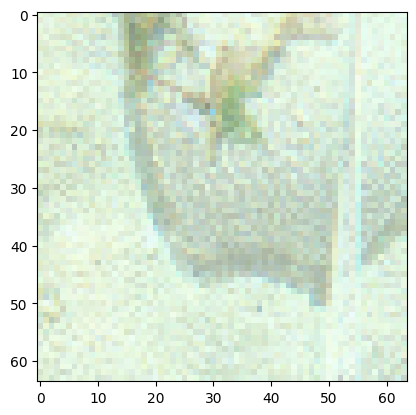

Coarse = {0: 0.36440754, 1: 0.63559246}
Medium = {1: 0.36440754, 9: 0.63559246}
Fine   = {15: 0.63559246, 32: 0.36440754}
Example =  12


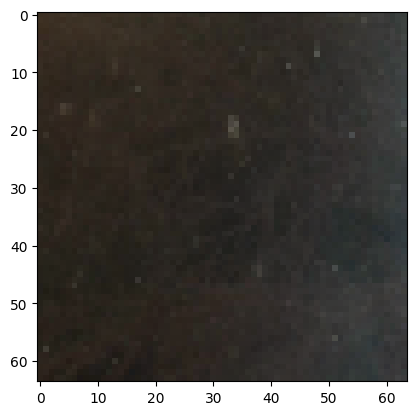

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.061255045, 34: 0.93874496}
Example =  13


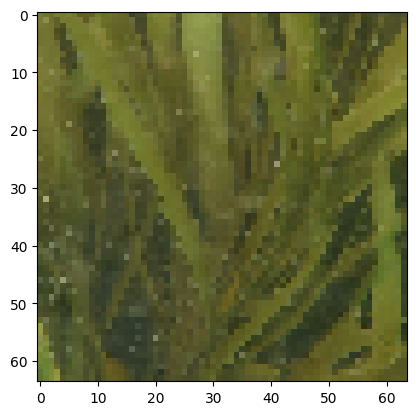

Coarse = {0: 1.0}
Medium = {1: 0.08424419, 7: 0.9157558}
Fine   = {32: 0.08424419, 33: 0.9157558}
Example =  14


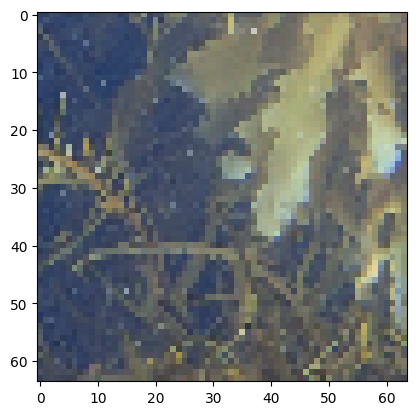

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.031601228, 33: 0.96839875}
Example =  15


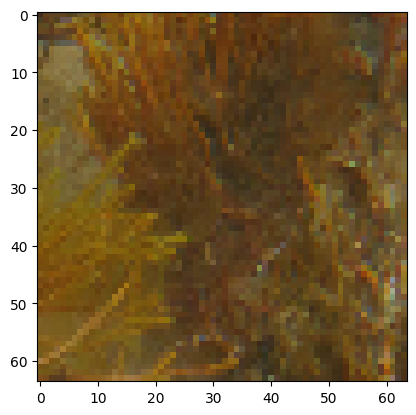

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  16


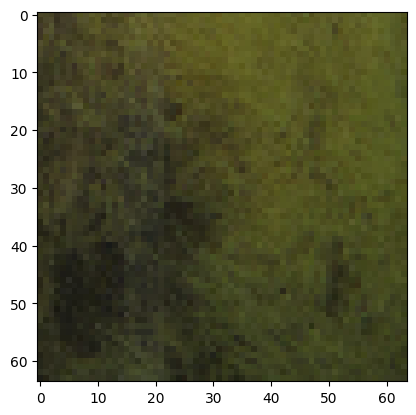

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.05127411, 34: 0.9487259}
Example =  17


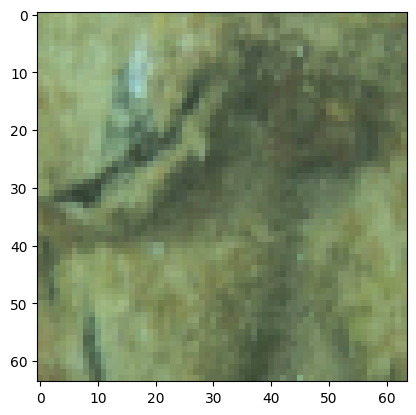

Coarse = {0: 1.0}
Medium = {3: 0.9699753, 7: 0.030024732}
Fine   = {7: 0.030024732, 26: 0.9699753}
Example =  18


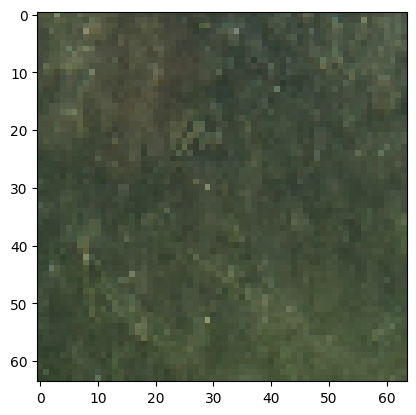

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 1.0}
Example =  19


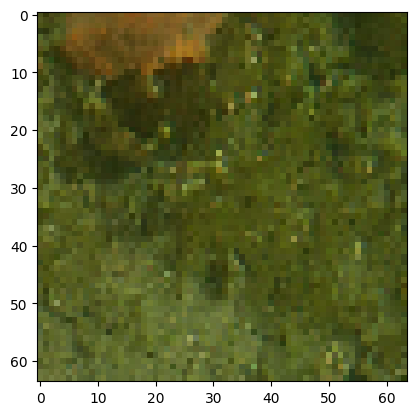

Coarse = {0: 0.96637714, 1: 0.03362286}
Medium = {0: 0.96637714, 9: 0.03362286}
Fine   = {15: 0.03362286, 28: 0.96637714}
Example =  20


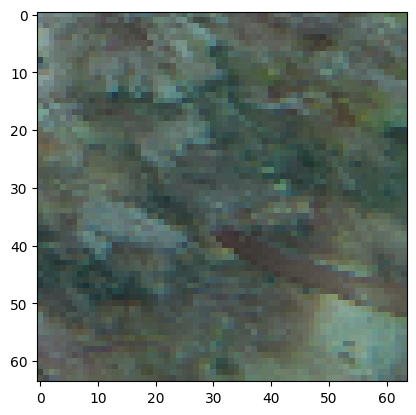

Coarse = {0: 0.97009563, 1: 0.029904366}
Medium = {7: 0.97009563, 9: 0.029904366}
Fine   = {4: 0.97009563, 15: 0.029904366}
Example =  21


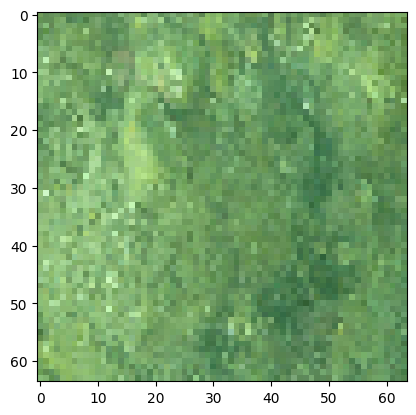

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 1.1887891e-05, 36: 0.99998814}
Example =  22


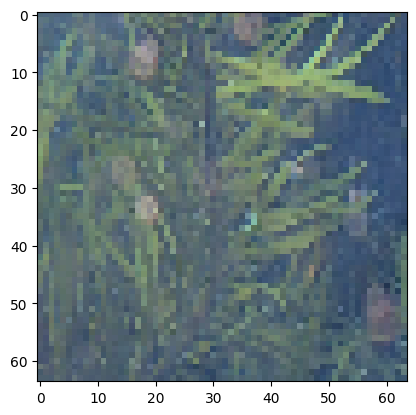

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.15898392, 33: 0.84101605}
Example =  23


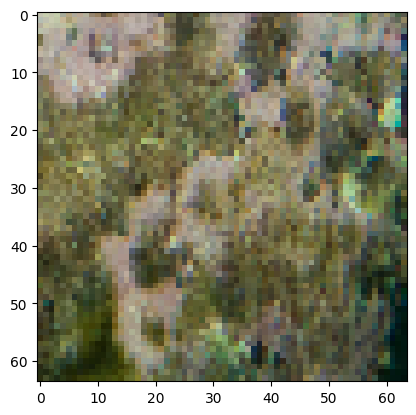

Coarse = {0: 1.0}
Medium = {0: 0.06668955, 7: 0.93331045}
Fine   = {7: 0.93331045, 28: 0.06668955}
Example =  24


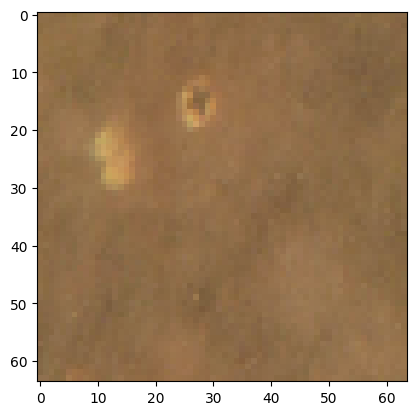

Coarse = {0: 1.0}
Medium = {5: 0.9882792, 7: 0.011720769}
Fine   = {5: 0.011720769, 17: 0.9882792}
Example =  25


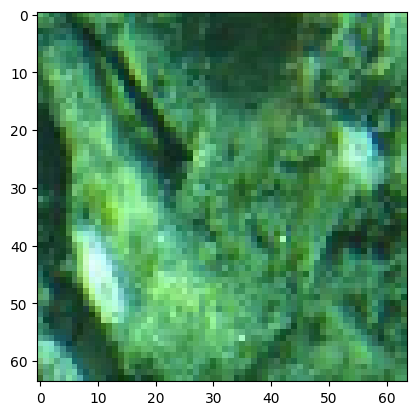

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {11: 0.9988417, 15: 0.0011583018}
Example =  26


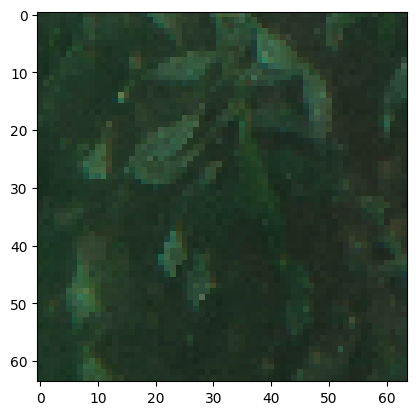

Coarse = {0: 1.0}
Medium = {6: 0.98112524, 7: 0.01887477}
Fine   = {25: 0.98112524, 33: 0.01887477}
Example =  27


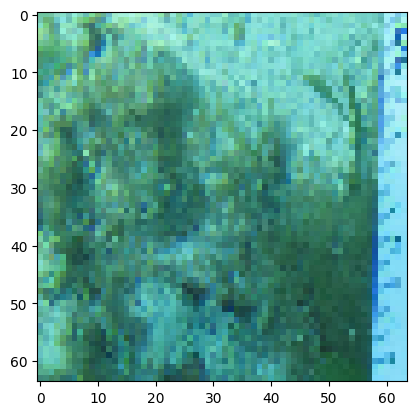

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {15: 1.0}
Example =  28


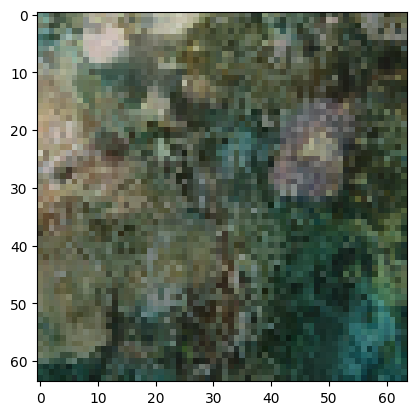

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.48648238, 6: 0.5135176}
Example =  29


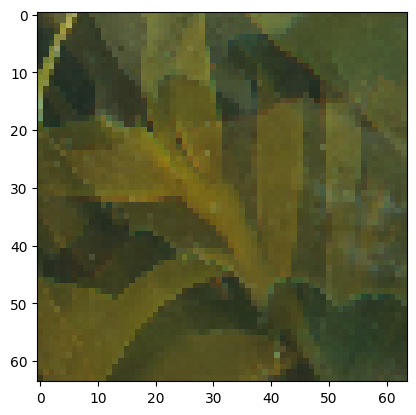

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  30


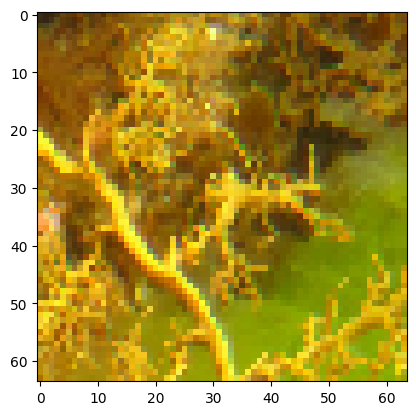

Coarse = {0: 0.99981785, 1: 0.0001821654}
Medium = {7: 0.99981785, 9: 0.0001821654}
Fine   = {11: 0.0001821654, 33: 0.99981785}
Example =  31


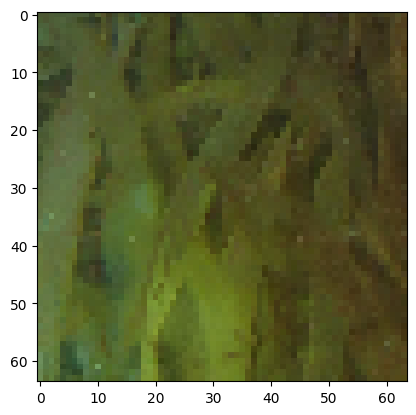

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.47653282, 33: 0.5234672}
Example =  32


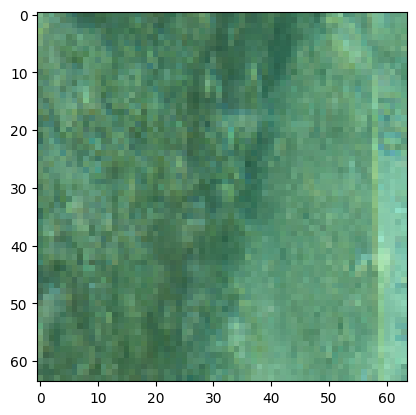

Coarse = {0: 1.0}
Medium = {4: 0.60616755, 7: 0.39383247}
Fine   = {10: 0.39383247, 18: 0.60616755}
Example =  33


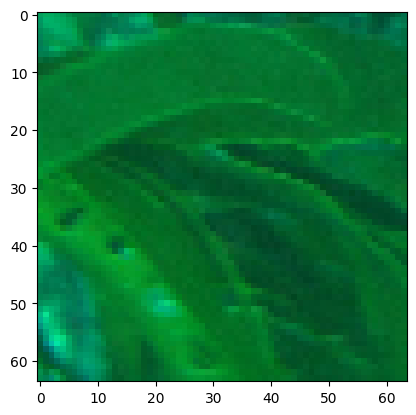

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  34


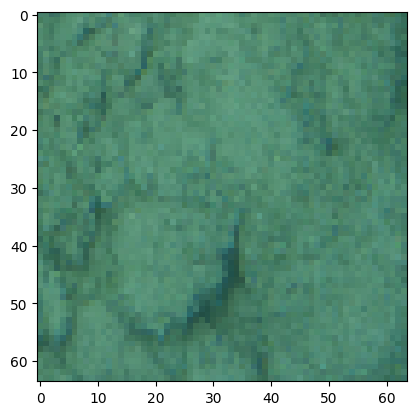

Coarse = {0: 0.0059044957, 1: 0.9940955}
Medium = {7: 0.0059044957, 9: 0.9940955}
Fine   = {33: 0.0059044957, 37: 0.9940955}
Example =  35


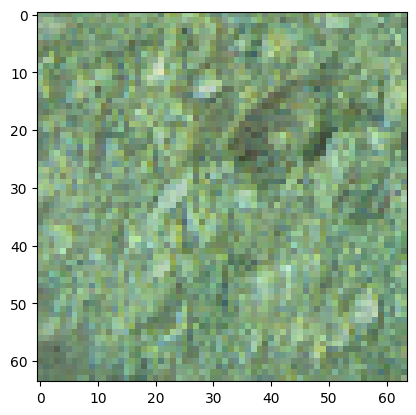

Coarse = {0: 0.51495254, 1: 0.48504746}
Medium = {7: 0.51495254, 9: 0.48504746}
Fine   = {10: 0.51495254, 11: 0.48504746}
Example =  36


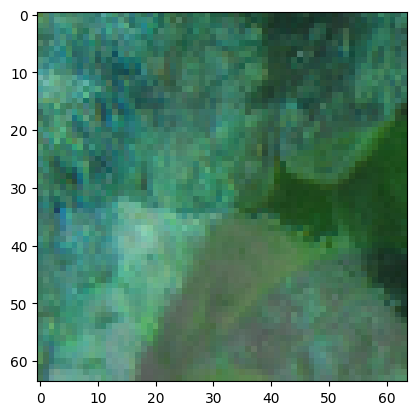

Coarse = {0: 1.0}
Medium = {1: 0.30339402, 7: 0.696606}
Fine   = {7: 0.696606, 32: 0.30339402}
Example =  37


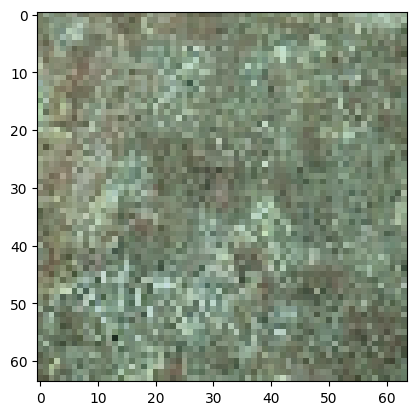

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.7495755, 36: 0.2504245}
Example =  38


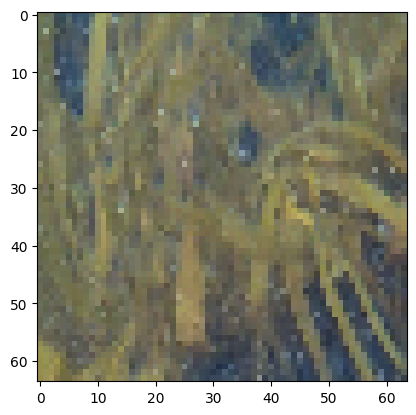

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.08692936, 33: 0.9130706}
Example =  39


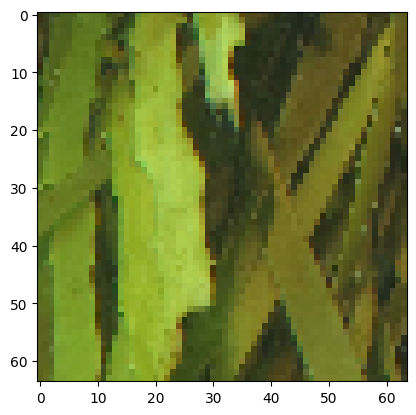

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.027024806, 33: 0.9729752}
Example =  40


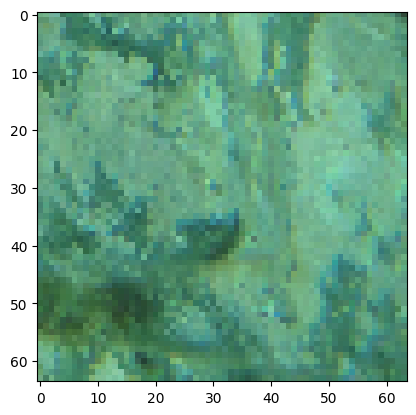

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.77791804, 36: 0.22208196}
Example =  41


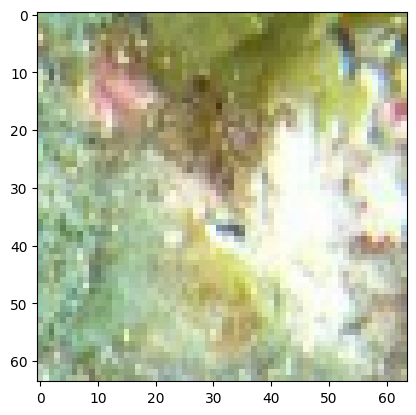

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 5.9604645e-08, 10: 0.99999994}
Example =  42


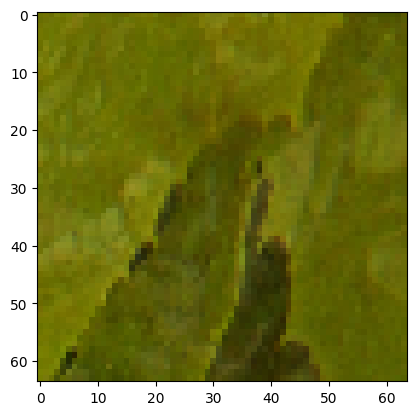

Coarse = {0: 1.0}
Medium = {6: 0.17741945, 7: 0.8225806}
Fine   = {25: 0.17741945, 33: 0.8225806}
Example =  43


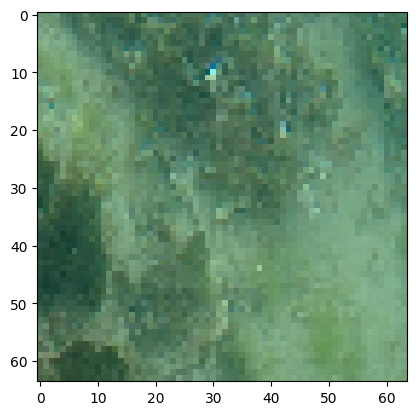

Coarse = {0: 1.0}
Medium = {0: 0.009268771, 7: 0.99073124}
Fine   = {0: 0.99073124, 28: 0.009268771}
Example =  44


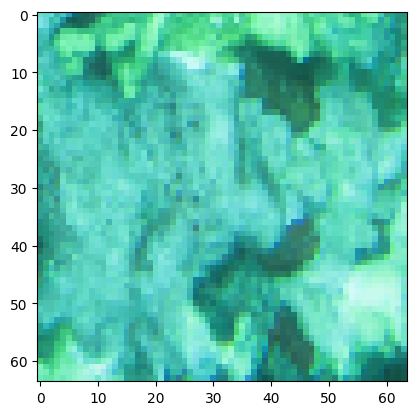

Coarse = {0: 1.0}
Medium = {1: 0.9762795, 7: 0.023720482}
Fine   = {0: 0.023720482, 32: 0.9762795}
Example =  45


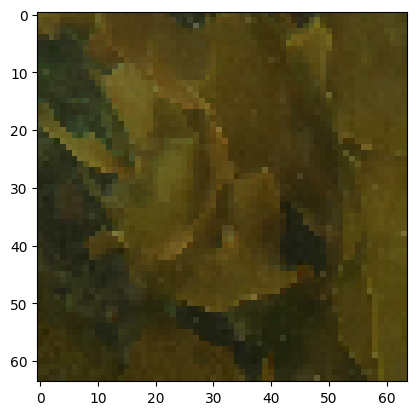

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.01166755, 33: 0.98833245}
Example =  46


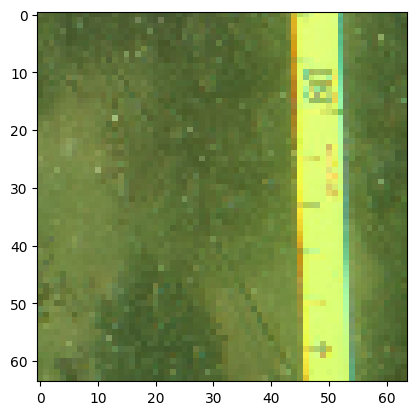

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.99994355, 10: 5.64456e-05}
Example =  47


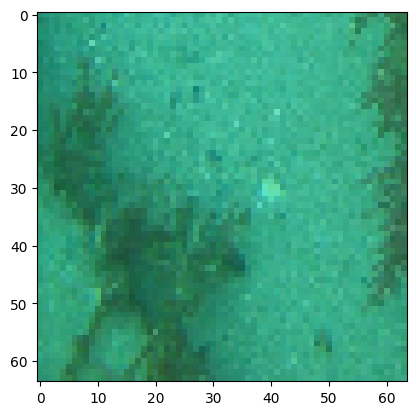

Coarse = {0: 1.3053417e-05, 1: 0.99998695}
Medium = {7: 1.3053417e-05, 9: 0.99998695}
Fine   = {2: 1.3053417e-05, 15: 0.99998695}
Example =  48


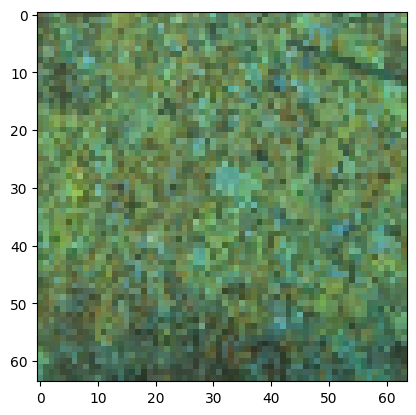

Coarse = {0: 0.454306, 1: 0.545694}
Medium = {7: 0.454306, 9: 0.545694}
Fine   = {4: 0.454306, 11: 0.545694}
Example =  49


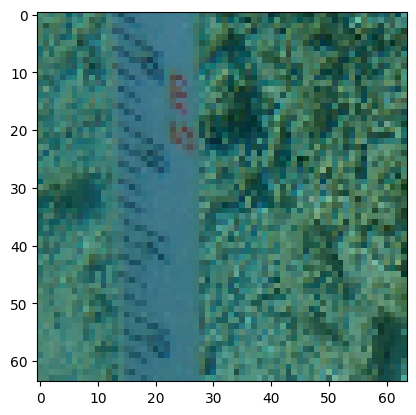

Coarse = {0: 0.018011278, 1: 0.9819887}
Medium = {7: 0.018011278, 9: 0.9819887}
Fine   = {4: 0.018011278, 37: 0.9819887}
Example =  50


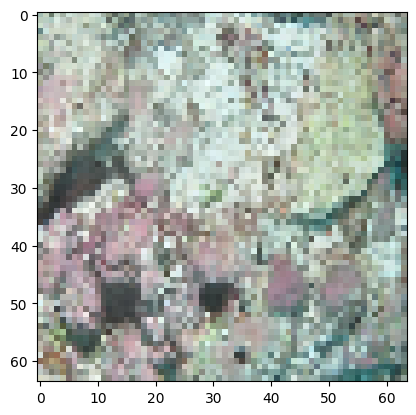

Coarse = {0: 0.0038482687, 1: 0.99615175}
Medium = {7: 0.0038482687, 9: 0.99615175}
Fine   = {11: 0.99615175, 33: 0.0038482687}
Example =  51


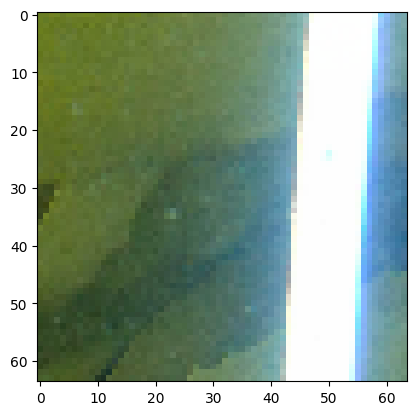

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  52


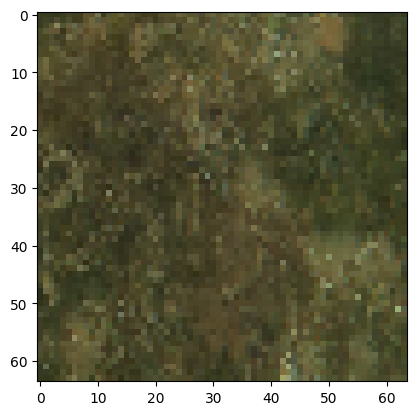

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.8721883, 33: 0.12781167}
Example =  53


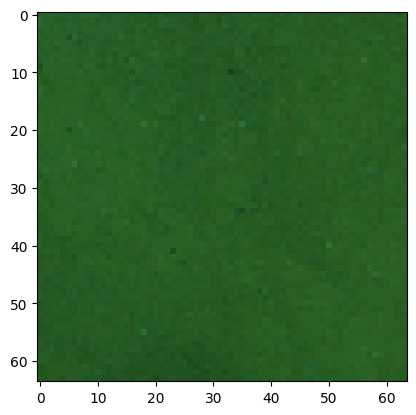

Coarse = {0: 0.00015109777, 1: 0.9998489}
Medium = {7: 0.00015109777, 9: 0.9998489}
Fine   = {15: 0.9998489, 33: 0.00015109777}
Example =  54


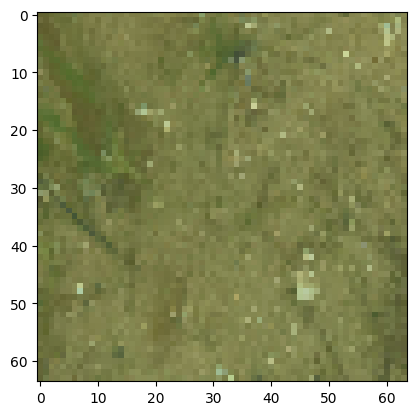

Coarse = {0: 0.0034295858, 1: 0.9965704}
Medium = {7: 0.0034295858, 9: 0.9965704}
Fine   = {6: 0.0034295858, 15: 0.9965704}
Example =  55


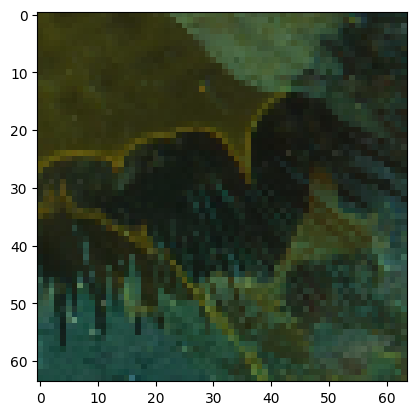

Coarse = {0: 1.0}
Medium = {0: 0.2902975, 7: 0.7097025}
Fine   = {6: 0.7097025, 31: 0.2902975}
Example =  56


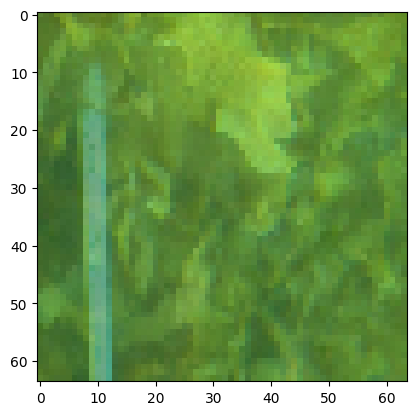

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  57


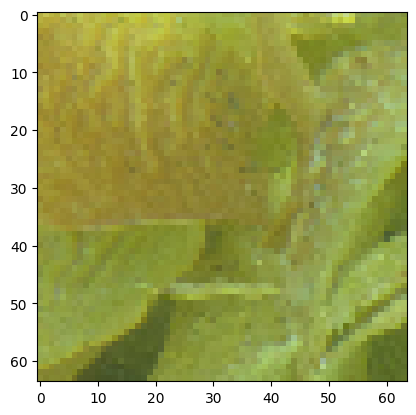

Coarse = {0: 0.98530924, 1: 0.014690729}
Medium = {7: 0.98530924, 9: 0.014690729}
Fine   = {0: 0.98530924, 15: 0.014690729}
Example =  58


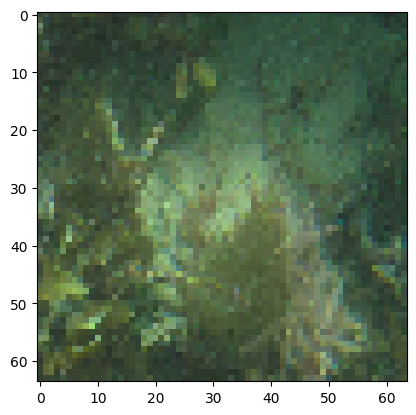

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.9966428, 36: 0.0033571762}
Example =  59


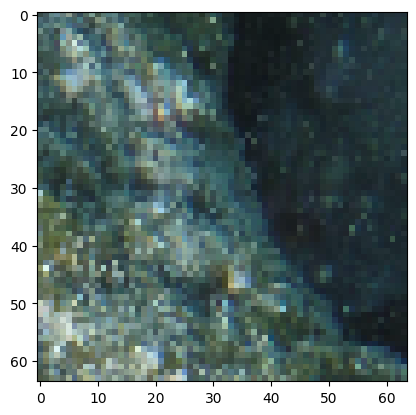

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.050620675, 10: 0.9493793}
Example =  60


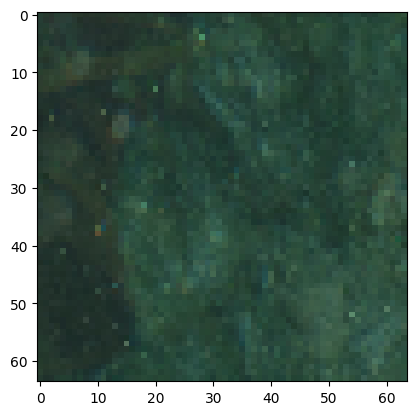

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.35676783, 33: 0.64323217}
Example =  61


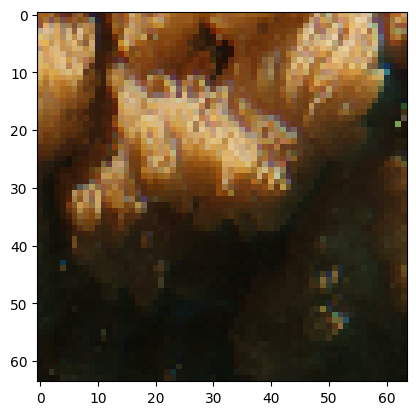

Coarse = {0: 1.0}
Medium = {1: 0.9343977, 7: 0.065602325}
Fine   = {7: 0.065602325, 32: 0.9343977}
Example =  62


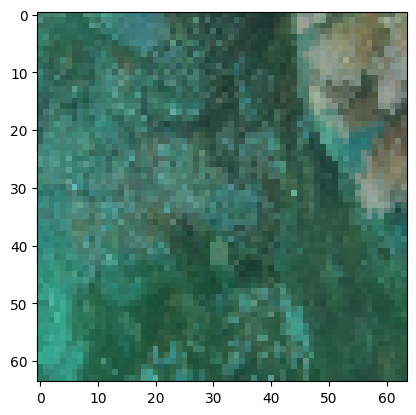

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {1: 0.31909248, 7: 0.6809075}
Example =  63


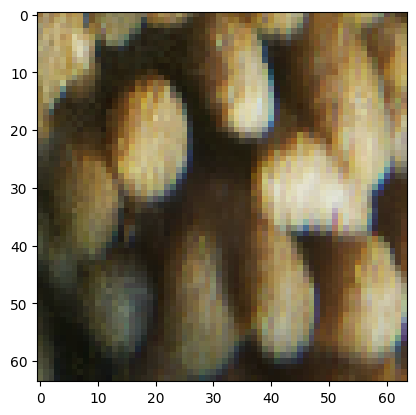

Coarse = {0: 1.0}
Medium = {1: 0.8787846, 7: 0.12121538}
Fine   = {32: 0.8787846, 33: 0.12121538}


In [7]:
for x,y in dataset.train_dataset.take(1):
    for i in range(len(x)):
        print('Example = ', i)
        plt.imshow(x[i])
        plt.show()
        print('Coarse =', {k:v for k,v in enumerate(y[0][i].numpy()) if v != 0}) # coarse lables
        print('Medium =', {k:v for k,v in enumerate(y[1][i].numpy()) if v != 0}) # medium lables
        print('Fine   =', {k:v for k,v in enumerate(y[2][i].numpy()) if v != 0}) # fine lables

In [8]:
for x,y in dataset.train_dataset.take(1):
    image_shape = x.shape[1:]
    coarse_label_shape = y[0].shape[1:]
    medium_label_shape = y[1].shape[1:]
    fine_label_shape = y[2].shape[1:]

## Learning Rate Decay Scheduler

In [9]:
def scheduler(epoch):
    learning_rate_init = train_params["lr"]
    
    if epoch > train_params["decay_exe"]:
        learning_rate_init = train_params["lr"] * (train_params["lr_decay"] ** (epoch-9))
        
    tf.summary.scalar('learning rate', data=learning_rate_init, step=epoch)
        
    return learning_rate_init

# Model Architecture

## Loss Function

In [10]:
coarse_class, medium_class, fine_class = dataset.num_classes

## For Dynamic LossWeights
initial_lw = models.initial_lw({"coarse": coarse_class,
                                 "medium": medium_class,
                                 "fine": fine_class})

lossweight = {'coarse_lw' : K.variable(value = initial_lw['coarse'], dtype="float32", name="coarse_lw"),
             'medium_lw' : K.variable(value = initial_lw['medium'], dtype="float32", name="medium_lw"),
             'fine_lw' : K.variable(value = initial_lw['fine'], dtype="float32", name="fine_lw"),
              'decoder_lw' : 0.0
             }

In [11]:
Matrix_coarse_to_medium_OneHot = dataset.Matrix_coarse_to_medium_OneHot
Matrix_medium_to_fine_OneHot = dataset.Matrix_medium_to_fine_OneHot

In [12]:
def margin_loss(y_true, y_proba):
    
    present_error_raw = tf.square(tf.maximum(0., 0.9 - y_proba), name="present_error_raw")
    absent_error_raw = tf.square(tf.maximum(0., y_proba - 0.1), name="absent_error_raw")
    L = tf.add(y_true * present_error_raw, 0.5 * (1.0 - y_true) * absent_error_raw,name="L")
    total_marginloss = tf.reduce_sum(L, axis=1, name="margin_loss")

    return total_marginloss


def consistency_check(y_pred_ancestor,y_pred_current,lookup_matrix,num_class_current):
    pred_max_ancestor = tf.argmax(y_pred_ancestor,axis=1)
    pred_max_current = tf.argmax(y_pred_current,axis=1)
    
    consistant_check = tf.gather(lookup_matrix, indices=pred_max_ancestor)*tf.one_hot(pred_max_current,num_class_current)
    
    return tf.reduce_sum(consistant_check,1)

def get_consistency(y_true_ancestor, y_pred, lookup_matrix):
    '''
    Get consistency based on 2 levels
    Provide ture levels for the level above, predictions for the current level and a look up metrix
    '''
    y_prob = tf.math.divide(y_pred,tf.reshape(tf.reduce_sum(y_pred,-1),(-1,1),name='reshape'),name='Probability')
    
    index_for_predictions = tf.cast(tf.math.argmax(y_true_ancestor,axis=1),dtype= 'int32')
    consistent_fine = tf.gather(lookup_matrix, indices=index_for_predictions) * y_prob
    Consistency_sum_array = tf.reduce_sum(consistent_fine, axis =1)
    
    return tf.abs(1-Consistency_sum_array)

def CustomLoss(y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f, LW_C, LW_M, LW_F,
               number_of_classes_m, number_of_classes_f, C_Weight=0.2):
    
    con_m = consistency_check(y_pred_c,y_pred_m,Matrix_coarse_to_medium_OneHot,num_class_current=number_of_classes_m)
    con_m_not = tf.abs(con_m-1)
    
    con_f = consistency_check(y_pred_m,y_pred_f,Matrix_medium_to_fine_OneHot,num_class_current=number_of_classes_f)
    con_f_not = tf.abs(con_f-1)
    
    con_sum_m = get_consistency(y_true_c,y_pred_m,Matrix_coarse_to_medium_OneHot)
    con_sum_f = get_consistency(y_true_m,y_pred_f,Matrix_medium_to_fine_OneHot)
    
    medium_lvl_cosistency = con_sum_m * con_m_not
    fine_lvl_cosistency = con_sum_f * con_f_not    
   
    ML_c = margin_loss(y_true_c, y_pred_c)*LW_C
    ML_m = LW_M*((1-C_Weight)*(margin_loss(y_true_m, y_pred_m))+C_Weight*(medium_lvl_cosistency))
    ML_f = LW_F*((1-C_Weight)*(margin_loss(y_true_f, y_pred_f))+C_Weight*(fine_lvl_cosistency))
    
    batch_loss = ML_c + ML_m+ ML_f

    return tf.reduce_mean(batch_loss)

## Architecture

In [13]:
def get_compiled_model():
    
    ## Calling the HD-CapsNet Model
    model = models.HD_CapsNet_Mod_3_3(input_shape     = image_shape, 
                                      input_shape_yc  = coarse_label_shape,
                                      input_shape_ym  = medium_label_shape,
                                      input_shape_yf  = fine_label_shape, 
                                      no_coarse_class = coarse_class, 
                                      no_medium_class = medium_class, 
                                      no_fine_class   = fine_class,
                                      PCap_n_dims     = 8, 
                                      SCap_f_dims     = 8, 
                                      SCap_m_dims     = 16, 
                                      SCap_c_dims     = 32)
    
    ## Saving Model Architecture
    keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)
    
    ## Add Loss for Model
    model.add_loss(CustomLoss(y_true_c            = model.inputs[1], 
                              y_true_m            = model.inputs[2], 
                              y_true_f            = model.inputs[3], 
                              y_pred_c            = model.output[0], 
                              y_pred_m            = model.output[1], 
                              y_pred_f            = model.output[2], 
                              LW_C                = lossweight['coarse_lw'], 
                              LW_M                = lossweight['medium_lw'], 
                              LW_F                = lossweight['fine_lw'],
                              number_of_classes_m = medium_class, 
                              number_of_classes_f = fine_class, 
                              C_Weight            =0.2)
                  )
    
    ## Compile Model
    model.compile(optimizer='adam',                  
                  metrics={'prediction_fine': 'accuracy',
                           'prediction_medium': 'accuracy',
                           'prediction_coarse': 'accuracy'}
                 )
    return model

## Compile Model

In [14]:
model = get_compiled_model()

In [15]:
model.summary()
# keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)

Model: "HD-CapsNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Image (InputLayer)       [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 64)   1792        ['Input_Image[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['block1_conv1[0][0]']           
 alization)                                                                                       
                                                                                                  
 block1_conv2 (Conv2D)          (None, 64, 64, 64)   36928       ['batch_normalization[0]

                                                                                                  
 prediction_medium (LengthLayer  (None, 10)          0           ['s_caps_medium[0][0]']          
 )                                                                                                
                                                                                                  
 prediction_fine (LengthLayer)  (None, 38)           0           ['s_caps_fine[0][0]']            
                                                                                                  
 tf.math.argmax_4 (TFOpLambda)  (None,)              0           ['input_yc[0][0]']               
                                                                                                  
 tf.math.reduce_sum_2 (TFOpLamb  (None,)             0           ['prediction_medium[0][0]']      
 da)                                                                                              
          

 )                                                                                                
                                                                                                  
 tf.math.square_2 (TFOpLambda)  (None, 10)           0           ['tf.math.maximum_2[0][0]']      
                                                                                                  
 tf.math.multiply_11 (TFOpLambd  (None, 10)          0           ['tf.math.subtract_9[0][0]']     
 a)                                                                                               
                                                                                                  
 tf.math.square_3 (TFOpLambda)  (None, 10)           0           ['tf.math.maximum_3[0][0]']      
                                                                                                  
 tf.math.reduce_sum_3 (TFOpLamb  (None,)             0           ['tf.math.multiply_2[0][0]']     
 da)      

 )                                                                                                
                                                                                                  
 tf.math.multiply_6 (TFOpLambda  (None, 2)           0           ['input_yc[0][0]',               
 )                                                                'tf.math.square[0][0]']         
                                                                                                  
 tf.math.multiply_8 (TFOpLambda  (None, 2)           0           ['tf.math.multiply_7[0][0]',     
 )                                                                'tf.math.square_1[0][0]']       
                                                                                                  
 tf.math.reduce_sum_7 (TFOpLamb  (None,)             0           ['tf.math.add_1[0][0]']          
 da)                                                                                              
          

## Training Pipeline Alignment

In [16]:
#### Matching the pipeling with model inputs
def pipeline_multi_input_output(image, label):
    label_0 = label[0]
    label_1 = label[1]
    label_2 = label[2]
    return (image, label_0, label_1, label_2), (label_0, label_1, label_2)

training_dataset_match = dataset.train_dataset.map(pipeline_multi_input_output) ## Mixup dataset
val_dataset_match = dataset.val_dataset.map(pipeline_multi_input_output) ## Val Dataset

## Callback

In [17]:
tb = keras.callbacks.TensorBoard(directory+'/tb_logs'+ datetime.now().strftime("%Y%m%d-%H%M%S"))
log = keras.callbacks.CSVLogger(directory+'/log.csv', append=True)

checkpoint = keras.callbacks.ModelCheckpoint(directory+'/epoch-best.h5',
                                             monitor='val_prediction_fine_accuracy',
                                             save_best_only=True, 
                                             save_weights_only=True, 
                                             verbose=1)

change_lw = models.LossWeightsModifier(lossweight = lossweight,
                                       initial_lw = initial_lw,
                                       directory = directory)

lr_decay = keras.callbacks.LearningRateScheduler(scheduler)

## Model Training

In [18]:
model_save_dir = str(directory+'/trained_model.h5')
try:
    model.load_weights(model_save_dir)
except:
    history = model.fit(training_dataset_match,
                        epochs = train_params["n_epochs"],
                        validation_data = val_dataset_match,
                        callbacks = [tb,log,change_lw,lr_decay,checkpoint],
                        verbose=1)
    
    model.save_weights(model_save_dir)

Epoch 1/100


2023-04-13 21:41:14.238167: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2023-04-13 21:41:21.106760: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-13 21:41:21.248018: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] RESOURCE_EXHAUSTED: /tmp/tempfile-luthin-42fdf16b-304223-5f936341a5fd1; No space left on device
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1848/1848 [==============================] - ETA: 0s - loss: 0.1748 - prediction_coarse_accuracy: 0.8565 - prediction_medium_accuracy: 0.7054 - prediction_fine_accuracy: 0.3689
  • Coarse Accuracy = 85.65% | Val_Accuracy = 85.19% | LossWeight = 0.26 
  • Medium Accuracy = 70.54% | Val_Accuracy = 68.63% | LossWeight = 0.45 
  • Fine   Accuracy = 36.89% | Val_Accuracy = 32.76% | LossWeight = 0.29 

Epoch 1: val_prediction_fine_accuracy improved from -inf to 0.32765, saving model to ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_1/epoch-best.h5
1848/1848 [==============================] - 221s 99ms/step - loss: 0.1748 - prediction_coarse_accuracy: 0.8565 - prediction_medium_accuracy: 0.7054 - prediction_fine_accuracy: 0.3689 - val_loss: 0.1806 - val_prediction_coarse_accuracy: 0.8519 - val_prediction_medium_accuracy: 0.6863 - val_prediction_fine_accuracy: 0.3276 - lr: 0.0010
Epoch 2/100
1848/1848 [==============================] - ETA: 0s - loss: 0.1378 - prediction_coarse_accuracy: 0.8607 - p

2023-04-13 21:55:43.027210: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4461 of 6400
2023-04-13 21:55:47.947969: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


1848/1848 [==============================] - ETA: 0s - loss: 0.1169 - prediction_coarse_accuracy: 0.8871 - prediction_medium_accuracy: 0.7610 - prediction_fine_accuracy: 0.4797
  • Coarse Accuracy = 88.71% | Val_Accuracy = 86.89% | LossWeight = 0.26 
  • Medium Accuracy = 76.10% | Val_Accuracy = 74.91% | LossWeight = 0.45 
  • Fine   Accuracy = 47.97% | Val_Accuracy = 48.56% | LossWeight = 0.29 

Epoch 6: val_prediction_fine_accuracy improved from 0.48292 to 0.48558, saving model to ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_1/epoch-best.h5
1848/1848 [==============================] - 370s 190ms/step - loss: 0.1169 - prediction_coarse_accuracy: 0.8871 - prediction_medium_accuracy: 0.7610 - prediction_fine_accuracy: 0.4797 - val_loss: 0.1163 - val_prediction_coarse_accuracy: 0.8689 - val_prediction_medium_accuracy: 0.7491 - val_prediction_fine_accuracy: 0.4856 - lr: 0.0010
Epoch 7/100
1848/1848 [==============================] - ETA: 0s - loss: 0.1135 - prediction_coarse_accuracy: 0.8908

1848/1848 [==============================] - ETA: 0s - loss: 0.0851 - prediction_coarse_accuracy: 0.9374 - prediction_medium_accuracy: 0.8487 - prediction_fine_accuracy: 0.5718
  • Coarse Accuracy = 93.74% | Val_Accuracy = 89.99% | LossWeight = 0.21 
  • Medium Accuracy = 84.87% | Val_Accuracy = 79.31% | LossWeight = 0.43 
  • Fine   Accuracy = 57.18% | Val_Accuracy = 54.88% | LossWeight = 0.36 

Epoch 15: val_prediction_fine_accuracy improved from 0.53928 to 0.54877, saving model to ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_1/epoch-best.h5
1848/1848 [==============================] - 168s 87ms/step - loss: 0.0851 - prediction_coarse_accuracy: 0.9374 - prediction_medium_accuracy: 0.8487 - prediction_fine_accuracy: 0.5718 - val_loss: 0.0987 - val_prediction_coarse_accuracy: 0.8999 - val_prediction_medium_accuracy: 0.7931 - val_prediction_fine_accuracy: 0.5488 - lr: 7.7378e-04
Epoch 16/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0808 - prediction_coarse_accuracy: 0

1848/1848 [==============================] - 154s 79ms/step - loss: 0.0589 - prediction_coarse_accuracy: 0.9706 - prediction_medium_accuracy: 0.9230 - prediction_fine_accuracy: 0.6465 - val_loss: 0.1004 - val_prediction_coarse_accuracy: 0.8914 - val_prediction_medium_accuracy: 0.7780 - val_prediction_fine_accuracy: 0.5566 - lr: 4.8767e-04
Epoch 25/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0576 - prediction_coarse_accuracy: 0.9719 - prediction_medium_accuracy: 0.9271 - prediction_fine_accuracy: 0.6530
  • Coarse Accuracy = 97.19% | Val_Accuracy = 89.38% | LossWeight = 0.16 
  • Medium Accuracy = 92.71% | Val_Accuracy = 78.00% | LossWeight = 0.35 
  • Fine   Accuracy = 65.30% | Val_Accuracy = 55.73% | LossWeight = 0.49 

Epoch 25: val_prediction_fine_accuracy improved from 0.55658 to 0.55733, saving model to ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_1/epoch-best.h5
1848/1848 [==============================] - 156s 80ms/step - loss: 0.0576 - prediction_coarse_accu

Epoch 34/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0498 - prediction_coarse_accuracy: 0.9765 - prediction_medium_accuracy: 0.9462 - prediction_fine_accuracy: 0.6988
  • Coarse Accuracy = 97.65% | Val_Accuracy = 89.97% | LossWeight = 0.16 
  • Medium Accuracy = 94.62% | Val_Accuracy = 78.22% | LossWeight = 0.31 
  • Fine   Accuracy = 69.88% | Val_Accuracy = 56.25% | LossWeight = 0.52 

Epoch 34: val_prediction_fine_accuracy did not improve from 0.56613
1848/1848 [==============================] - 153s 79ms/step - loss: 0.0498 - prediction_coarse_accuracy: 0.9765 - prediction_medium_accuracy: 0.9462 - prediction_fine_accuracy: 0.6988 - val_loss: 0.0989 - val_prediction_coarse_accuracy: 0.8997 - val_prediction_medium_accuracy: 0.7822 - val_prediction_fine_accuracy: 0.5625 - lr: 2.9199e-04
Epoch 35/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0491 - prediction_coarse_accuracy: 0.9775 - prediction_medium_accuracy: 0.9486 - prediction_fine_accur

1848/1848 [==============================] - 155s 80ms/step - loss: 0.0455 - prediction_coarse_accuracy: 0.9787 - prediction_medium_accuracy: 0.9534 - prediction_fine_accuracy: 0.7411 - val_loss: 0.1011 - val_prediction_coarse_accuracy: 0.8978 - val_prediction_medium_accuracy: 0.7784 - val_prediction_fine_accuracy: 0.5637 - lr: 1.8403e-04
Epoch 44/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0450 - prediction_coarse_accuracy: 0.9785 - prediction_medium_accuracy: 0.9540 - prediction_fine_accuracy: 0.7462
  • Coarse Accuracy = 97.85% | Val_Accuracy = 89.99% | LossWeight = 0.17 
  • Medium Accuracy = 95.40% | Val_Accuracy = 78.80% | LossWeight = 0.31 
  • Fine   Accuracy = 74.62% | Val_Accuracy = 56.15% | LossWeight = 0.51 

Epoch 44: val_prediction_fine_accuracy did not improve from 0.56681
1848/1848 [==============================] - 154s 79ms/step - loss: 0.0450 - prediction_coarse_accuracy: 0.9785 - prediction_medium_accuracy: 0.9540 - prediction_fine_accuracy: 0

2023-04-13 23:47:05.755454: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1840 of 6400
2023-04-13 23:47:15.825016: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3667 of 6400
2023-04-13 23:47:25.770252: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5530 of 6400
2023-04-13 23:47:30.679652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


1848/1848 [==============================] - ETA: 0s - loss: 0.0445 - prediction_coarse_accuracy: 0.9793 - prediction_medium_accuracy: 0.9556 - prediction_fine_accuracy: 0.7525
  • Coarse Accuracy = 97.93% | Val_Accuracy = 89.95% | LossWeight = 0.17 
  • Medium Accuracy = 95.56% | Val_Accuracy = 78.46% | LossWeight = 0.31 
  • Fine   Accuracy = 75.25% | Val_Accuracy = 56.09% | LossWeight = 0.52 

Epoch 46: val_prediction_fine_accuracy did not improve from 0.56681
1848/1848 [==============================] - 214s 95ms/step - loss: 0.0445 - prediction_coarse_accuracy: 0.9793 - prediction_medium_accuracy: 0.9556 - prediction_fine_accuracy: 0.7525 - val_loss: 0.1009 - val_prediction_coarse_accuracy: 0.8995 - val_prediction_medium_accuracy: 0.7846 - val_prediction_fine_accuracy: 0.5609 - lr: 1.5778e-04
Epoch 47/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0438 - prediction_coarse_accuracy: 0.9795 - prediction_medium_accuracy: 0.9572 - prediction_fine_accuracy: 0.7596
 

2023-04-14 00:09:30.723793: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1956 of 6400
2023-04-14 00:09:40.692370: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3989 of 6400
2023-04-14 00:09:50.690818: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5880 of 6400
2023-04-14 00:09:53.372314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


1848/1848 [==============================] - ETA: 0s - loss: 0.0427 - prediction_coarse_accuracy: 0.9795 - prediction_medium_accuracy: 0.9573 - prediction_fine_accuracy: 0.7757
  • Coarse Accuracy = 97.95% | Val_Accuracy = 90.08% | LossWeight = 0.18 
  • Medium Accuracy = 95.73% | Val_Accuracy = 78.59% | LossWeight = 0.32 
  • Fine   Accuracy = 77.57% | Val_Accuracy = 56.12% | LossWeight = 0.50 

Epoch 52: val_prediction_fine_accuracy did not improve from 0.56681
1848/1848 [==============================] - 230s 104ms/step - loss: 0.0427 - prediction_coarse_accuracy: 0.9795 - prediction_medium_accuracy: 0.9573 - prediction_fine_accuracy: 0.7757 - val_loss: 0.1000 - val_prediction_coarse_accuracy: 0.9008 - val_prediction_medium_accuracy: 0.7859 - val_prediction_fine_accuracy: 0.5612 - lr: 1.1598e-04
Epoch 53/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0427 - prediction_coarse_accuracy: 0.9791 - prediction_medium_accuracy: 0.9576 - prediction_fine_accuracy: 0.7774


1848/1848 [==============================] - 154s 79ms/step - loss: 0.0415 - prediction_coarse_accuracy: 0.9791 - prediction_medium_accuracy: 0.9582 - prediction_fine_accuracy: 0.7976 - val_loss: 0.1022 - val_prediction_coarse_accuracy: 0.8975 - val_prediction_medium_accuracy: 0.7835 - val_prediction_fine_accuracy: 0.5585 - lr: 7.3098e-05
Epoch 62/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0412 - prediction_coarse_accuracy: 0.9795 - prediction_medium_accuracy: 0.9591 - prediction_fine_accuracy: 0.8011
  • Coarse Accuracy = 97.95% | Val_Accuracy = 89.92% | LossWeight = 0.20 
  • Medium Accuracy = 95.91% | Val_Accuracy = 78.31% | LossWeight = 0.33 
  • Fine   Accuracy = 80.11% | Val_Accuracy = 55.84% | LossWeight = 0.48 

Epoch 62: val_prediction_fine_accuracy did not improve from 0.56681
1848/1848 [==============================] - 153s 79ms/step - loss: 0.0412 - prediction_coarse_accuracy: 0.9795 - prediction_medium_accuracy: 0.9591 - prediction_fine_accuracy: 0

1848/1848 [==============================] - ETA: 0s - loss: 0.0403 - prediction_coarse_accuracy: 0.9798 - prediction_medium_accuracy: 0.9589 - prediction_fine_accuracy: 0.8125
  • Coarse Accuracy = 97.98% | Val_Accuracy = 89.99% | LossWeight = 0.20 
  • Medium Accuracy = 95.89% | Val_Accuracy = 78.33% | LossWeight = 0.34 
  • Fine   Accuracy = 81.25% | Val_Accuracy = 55.58% | LossWeight = 0.46 

Epoch 71: val_prediction_fine_accuracy did not improve from 0.56681
1848/1848 [==============================] - 156s 81ms/step - loss: 0.0403 - prediction_coarse_accuracy: 0.9798 - prediction_medium_accuracy: 0.9589 - prediction_fine_accuracy: 0.8125 - val_loss: 0.1032 - val_prediction_coarse_accuracy: 0.8999 - val_prediction_medium_accuracy: 0.7833 - val_prediction_fine_accuracy: 0.5558 - lr: 4.3766e-05
Epoch 72/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0407 - prediction_coarse_accuracy: 0.9792 - prediction_medium_accuracy: 0.9584 - prediction_fine_accuracy: 0.8131
 

1848/1848 [==============================] - 154s 79ms/step - loss: 0.0403 - prediction_coarse_accuracy: 0.9795 - prediction_medium_accuracy: 0.9591 - prediction_fine_accuracy: 0.8201 - val_loss: 0.1038 - val_prediction_coarse_accuracy: 0.8987 - val_prediction_medium_accuracy: 0.7836 - val_prediction_fine_accuracy: 0.5544 - lr: 2.7584e-05
Epoch 81/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0400 - prediction_coarse_accuracy: 0.9796 - prediction_medium_accuracy: 0.9588 - prediction_fine_accuracy: 0.8220
  • Coarse Accuracy = 97.96% | Val_Accuracy = 89.95% | LossWeight = 0.21 
  • Medium Accuracy = 95.88% | Val_Accuracy = 78.58% | LossWeight = 0.35 
  • Fine   Accuracy = 82.20% | Val_Accuracy = 55.60% | LossWeight = 0.45 

Epoch 81: val_prediction_fine_accuracy did not improve from 0.56681
1848/1848 [==============================] - 155s 80ms/step - loss: 0.0400 - prediction_coarse_accuracy: 0.9796 - prediction_medium_accuracy: 0.9588 - prediction_fine_accuracy: 0

1848/1848 [==============================] - ETA: 0s - loss: 0.0394 - prediction_coarse_accuracy: 0.9794 - prediction_medium_accuracy: 0.9602 - prediction_fine_accuracy: 0.8285
  • Coarse Accuracy = 97.94% | Val_Accuracy = 89.94% | LossWeight = 0.21 
  • Medium Accuracy = 96.02% | Val_Accuracy = 78.41% | LossWeight = 0.34 
  • Fine   Accuracy = 82.85% | Val_Accuracy = 55.29% | LossWeight = 0.44 

Epoch 90: val_prediction_fine_accuracy did not improve from 0.56681
1848/1848 [==============================] - 152s 79ms/step - loss: 0.0394 - prediction_coarse_accuracy: 0.9794 - prediction_medium_accuracy: 0.9602 - prediction_fine_accuracy: 0.8285 - val_loss: 0.1035 - val_prediction_coarse_accuracy: 0.8994 - val_prediction_medium_accuracy: 0.7841 - val_prediction_fine_accuracy: 0.5529 - lr: 1.6515e-05
Epoch 91/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0396 - prediction_coarse_accuracy: 0.9804 - prediction_medium_accuracy: 0.9604 - prediction_fine_accuracy: 0.8278
 

1848/1848 [==============================] - 156s 80ms/step - loss: 0.0393 - prediction_coarse_accuracy: 0.9806 - prediction_medium_accuracy: 0.9609 - prediction_fine_accuracy: 0.8311 - val_loss: 0.1039 - val_prediction_coarse_accuracy: 0.8999 - val_prediction_medium_accuracy: 0.7850 - val_prediction_fine_accuracy: 0.5534 - lr: 1.0409e-05
Epoch 100/100
1848/1848 [==============================] - ETA: 0s - loss: 0.0395 - prediction_coarse_accuracy: 0.9798 - prediction_medium_accuracy: 0.9598 - prediction_fine_accuracy: 0.8289
  • Coarse Accuracy = 97.98% | Val_Accuracy = 89.96% | LossWeight = 0.21 
  • Medium Accuracy = 95.98% | Val_Accuracy = 78.53% | LossWeight = 0.35 
  • Fine   Accuracy = 82.89% | Val_Accuracy = 55.34% | LossWeight = 0.44 

Epoch 100: val_prediction_fine_accuracy did not improve from 0.56681
1848/1848 [==============================] - 154s 79ms/step - loss: 0.0395 - prediction_coarse_accuracy: 0.9798 - prediction_medium_accuracy: 0.9598 - prediction_fine_accuracy:

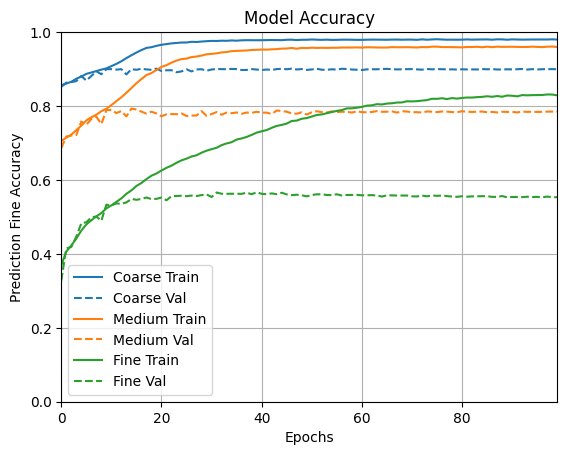

In [19]:
try:
    history_dict = history.history

    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"Coarse": history}, metric = "prediction_coarse_accuracy")
    plotter.plot({"Medium": history}, metric = "prediction_medium_accuracy")
    plotter.plot({"Fine": history}, metric = "prediction_fine_accuracy")
    plt.title("Model Accuracy")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

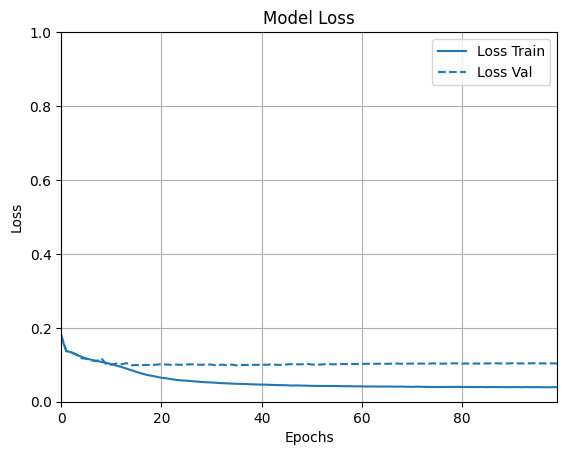

In [20]:
try:
    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"loss": history}, metric = "loss")
    plt.title("Model Loss")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

## Model Analysis

In [21]:
final_model = keras.Model(model.inputs[:1], model.output)

lossfn = models.MarginLoss()
final_model.compile(optimizer='adam', 
                    loss={'prediction_fine' : lossfn,
                          'prediction_medium' : lossfn,
                          'prediction_coarse' : lossfn},

                    loss_weights={'prediction_fine' : lossweight['fine_lw'],
                                  'prediction_medium' : lossweight['medium_lw'],
                                  'prediction_coarse' : lossweight['coarse_lw']},

                    metrics={'prediction_fine': 'accuracy',
                             'prediction_medium': 'accuracy',
                             'prediction_coarse': 'accuracy'
                            }
                   )

In [22]:
results = final_model.evaluate(dataset.test_dataset)
for n in range(len(results)):
    print(str(n+1)+'.',final_model.metrics_names[n], '==>', results[n])
# model_predictions = final_model.predict(dataset.test_dataset)

419/419 [==============================] - 155s 365ms/step - loss: 0.2301 - prediction_coarse_loss: 0.0743 - prediction_medium_loss: 0.1681 - prediction_fine_loss: 0.3523 - prediction_coarse_accuracy: 0.8995 - prediction_medium_accuracy: 0.7830 - prediction_fine_accuracy: 0.5457
1. loss ==> 0.23013940453529358
2. prediction_coarse_loss ==> 0.07433739304542542
3. prediction_medium_loss ==> 0.16813401877880096
4. prediction_fine_loss ==> 0.35234060883522034
5. prediction_coarse_accuracy ==> 0.8995447158813477
6. prediction_medium_accuracy ==> 0.7829688787460327
7. prediction_fine_accuracy ==> 0.5457123517990112


In [23]:
def predict_from_pipeline(model, dataset):
    y_pred_c = []
    y_pred_m = []
    y_pred_f = []
    
    y_true_c = []
    y_true_m = []
    y_true_f = []
    for x, y in dataset:
        batch_pred = model.predict(x)
        
        y_true_c.extend(y[0].numpy().tolist())
        y_true_m.extend(y[1].numpy().tolist())
        y_true_f.extend(y[2].numpy().tolist())
        
        y_pred_c.extend(batch_pred[0].tolist())
        y_pred_m.extend(batch_pred[1].tolist())
        y_pred_f.extend(batch_pred[2].tolist())
        
    return np.array(y_true_c), np.array(y_true_m), np.array(y_true_f), np.array(y_pred_c), np.array(y_pred_m), np.array(y_pred_f)

In [24]:
y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f = predict_from_pipeline(final_model, dataset.test_dataset)

  • Confusion_Matrix 

  • COARSE LEVEL 
[[22314   766]
 [ 1926  1792]]

  • MEDIUM LEVEL 
[[   62    92     0     2     0     4     2   526     0    55]
 [   38  1152     1     1     2     6     3   992     0   130]
 [    1     1     0     0     0     0     0    22     0     0]
 [    3     8     0    22     0     2     0    74     0    10]
 [    1     1     0     0     0     0     0    45     0     2]
 [    2    14     0     0     0     7     1   106     0    14]
 [    3    12     0     0     1     0   384   277     0    18]
 [   98   497     0    15     6     8   109 17434     0   795]
 [    0     0     0     0     0     0     0    16     0     3]
 [   36   157     1     2     1     4    12  1584     0  1921]]

  • FINE LEVEL 
[[422  23   9 ...   0  56  10]
 [ 41 188  11 ...   0  15   0]
 [ 41  33  65 ...   0  12   1]
 ...
 [ 11   9   1 ...   0   6   0]
 [ 76  15   4 ...   0  99   2]
 [ 17   2   2 ...   0   0 224]]

  • Classification Report 


  • COARSE LEVEL 


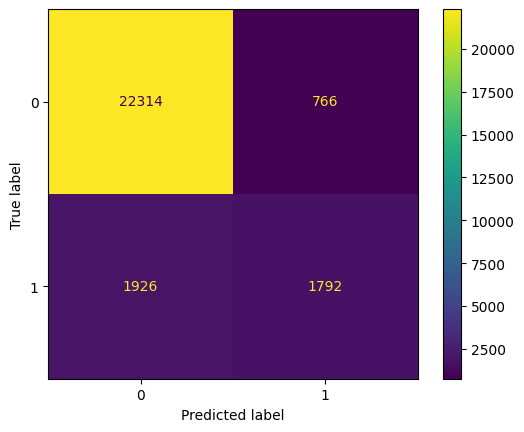

              precision    recall  f1-score   support

           0    0.92054   0.96681   0.94311     23080
           1    0.70055   0.48198   0.57106      3718

    accuracy                        0.89954     26798
   macro avg    0.81055   0.72440   0.75709     26798
weighted avg    0.89002   0.89954   0.89149     26798


  • MEDIUM LEVEL 


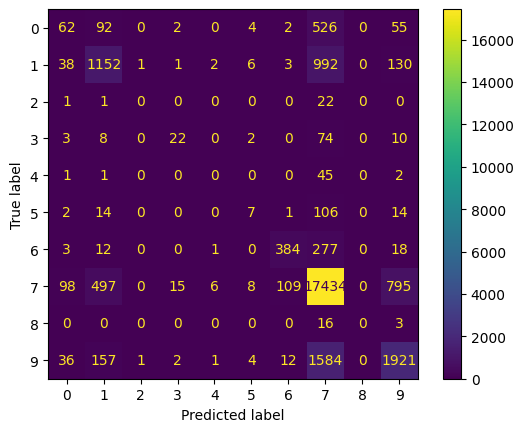

/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0    0.25410   0.08345   0.12563       743
           1    0.59566   0.49548   0.54097      2325
           2    0.00000   0.00000   0.00000        24
           3    0.52381   0.18487   0.27329       119
           4    0.00000   0.00000   0.00000        49
           5    0.22581   0.04861   0.08000       144
           6    0.75147   0.55252   0.63682       695
           7    0.82720   0.91942   0.87087     18962
           8    0.00000   0.00000   0.00000        19
           9    0.65163   0.51668   0.57636      3718

    accuracy                        0.78297     26798
   macro avg    0.38297   0.28010   0.31039     26798
weighted avg    0.75748   0.78297   0.76476     26798


  • FINE LEVEL 


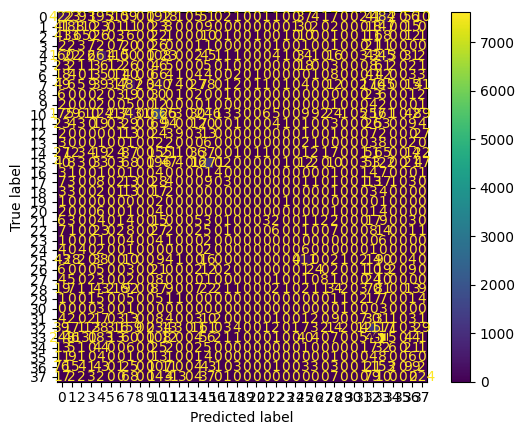

              precision    recall  f1-score   support

           0    0.27243   0.25732   0.26466      1640
           1    0.39167   0.35472   0.37228       530
           2    0.46429   0.20701   0.28634       314
           3    0.11864   0.06604   0.08485       106
           4    0.39066   0.41995   0.40478      1574
           5    0.04762   0.00410   0.00755       244
           6    0.08029   0.03806   0.05164       289
           7    0.27765   0.33039   0.30173      1474
           8    0.00000   0.00000   0.00000        96
           9    0.00000   0.00000   0.00000        30
          10    0.43318   0.50577   0.46667      3294
          11    0.28659   0.21963   0.24868       428
          12    0.21429   0.08491   0.12162       106
          13    0.00000   0.00000   0.00000        31
          14    0.19672   0.06261   0.09499       575
          15    0.59504   0.64781   0.62030      1962
          16    0.30769   0.13793   0.19048        29
          17    0.12000   0

/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [25]:
metrics.lvl_wise_metric([y_true_c, y_true_m, y_true_f],
                        [y_pred_c, y_pred_m, y_pred_f])

In [26]:
h_measurements,consistency,exact_match = metrics.hmeasurements([y_true_c, y_true_m, y_true_f],
                                                               [y_pred_c, y_pred_m, y_pred_f],
                                                               dataset.get_tree())
print('\nHierarchical Precision =',h_measurements[0],
      '\nHierarchical Recall =', h_measurements[1],
      '\nHierarchical F1-Score =',h_measurements[2],
      '\nConsistency = ', consistency,
      '\nExact Match = ', exact_match,
     )


Hierarchical Precision = 0.7400844590392318 
Hierarchical Recall = 0.7524566509938552 
Hierarchical F1-Score = 0.7450787016799406 
Consistency =  0.9367116949026046 
Exact Match =  0.5285469064855586
